In [2]:
## Optimization
## Weight Parameter Initialization
## HyperParameter Setting
## Weight Decay, Dropout  -- Regularization
## Batch Normalization

In [3]:
## << Optimization >>

In [4]:
## Stochastic Gradient Descent(SGD)

class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [5]:
## SGD with Momentum

class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {} #v는 초기화 때 아무 값도 담지 않고, update()가 처음 호출될 때 매개변수와 같은 구조의 딕셔너리 변수로 저장
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [6]:
## SGD with Nesterov Momentum

class Nesterov:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

In [7]:
## Adagrad

class Adagrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grad[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [9]:
## AdaGrad가 과거의 기울기를 제곱하여 계속 더해갈수록 학습 갱신 강도가 약해져 어느 순간 전혀 갱신되지 않게 된다.
## RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영시킴.
## 이를 지수 이동 평균( Exponential Moving Average = EMA)라고 하며 과거 기울기 반영 규모를 기하급수적으로 감소시킨다. 

class RMSProp:
    def __init__(self, lr = 0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [10]:
## Adam 

class Adam:
    def __init__(self, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
        self.lr = lr
        self.beta1 = beta1
        self.bata2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

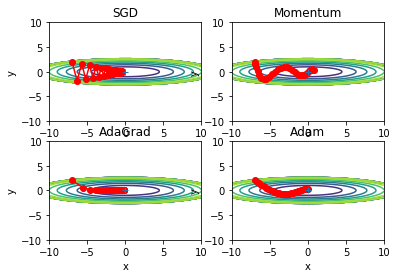

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()


===========iteration:0===========
SGD:2.3419255629402222
Momentum:2.393800364943914
AdaGrad:2.543700511504543
Adam:2.1088823920994146
===========iteration:100===========
SGD:1.2485209152774845
Momentum:0.2652849415153146
AdaGrad:0.07977982760503993
Adam:0.12693111322517386
===========iteration:200===========
SGD:0.6366139016703298
Momentum:0.16926518994075707
AdaGrad:0.07888263783711014
Adam:0.13641670780901133
===========iteration:300===========
SGD:0.38612290354526313
Momentum:0.14602911644308655
AdaGrad:0.06789240881379434
Adam:0.10313913574254904
===========iteration:400===========
SGD:0.3298476943841435
Momentum:0.1792608450302569
AdaGrad:0.12139459993196552
Adam:0.13642609873833667
===========iteration:500===========
SGD:0.31652234516674616
Momentum:0.08170517399652182
AdaGrad:0.04148889950418731
Adam:0.05360134826388339
===========iteration:600===========
SGD:0.4213134486490948
Momentum:0.16556761992997862
AdaGrad:0.0839835785263903
Adam:0.09905441204490338
===========iteration:

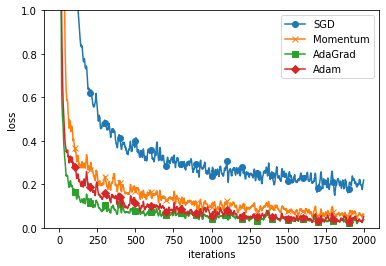

In [12]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [14]:
## << Weight Initialization >>

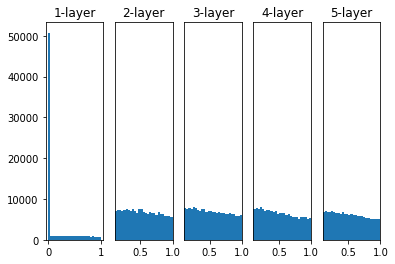

In [36]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    
    # w = np.random.randn(node_num, node_num) * 1                            # 표준편차 1
    # w = np.random.randn(node_num, node_num) * 0.01                       # 표준편차 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)    # Xavier
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)    # He


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    
    if i != 0:
        plt.yticks([], [])
        plt.xlim(0.1, 1)
        plt.ylim(0, 7000)   
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()


===========iteration:0===========
std=0.01:2.3025755623529873
Xavier:2.309903683346435
He:2.3744857003125937
===========iteration:100===========
std=0.01:2.3019907386570764
Xavier:2.267473821481663
He:1.5589841210076605
===========iteration:200===========
std=0.01:2.3020026338346327
Xavier:2.1688278870051523
He:0.8530271397533579
===========iteration:300===========
std=0.01:2.3023757171957966
Xavier:1.9847763053769483
He:0.540466112114637
===========iteration:400===========
std=0.01:2.302414076338639
Xavier:1.5070367187874647
He:0.44179383913476133
===========iteration:500===========
std=0.01:2.302229822116266
Xavier:1.084722738087081
He:0.406725869936173
===========iteration:600===========
std=0.01:2.2998017432258506
Xavier:0.7551340530100095
He:0.3296175777384909
===========iteration:700===========
std=0.01:2.299596313097786
Xavier:0.6414484151806095
He:0.24122798630928616
===========iteration:800===========
std=0.01:2.3021953538047883
Xavier:0.44681560175862284
He:0.2208680261958643

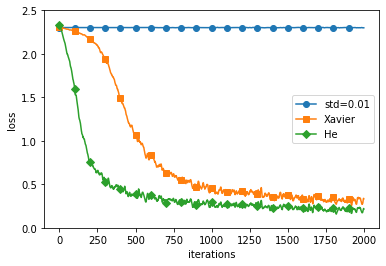

In [37]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


In [38]:
## << Batch Normalization >>

============== 1/16 ==============
epoch:0 | 0.105 - 0.078


D:\MyProject\밑바닥 1\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\MyProject\밑바닥 1\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\MyProject\밑바닥 1\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
D:\MyProject\밑바닥 1\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.112
epoch:2 | 0.097 - 0.169
epoch:3 | 0.097 - 0.188
epoch:4 | 0.097 - 0.213
epoch:5 | 0.097 - 0.235
epoch:6 | 0.097 - 0.233
epoch:7 | 0.097 - 0.256
epoch:8 | 0.097 - 0.275
epoch:9 | 0.097 - 0.287
epoch:10 | 0.097 - 0.314
epoch:11 | 0.097 - 0.333
epoch:12 | 0.097 - 0.362
epoch:13 | 0.097 - 0.381
epoch:14 | 0.097 - 0.387
epoch:15 | 0.097 - 0.408
epoch:16 | 0.097 - 0.428
epoch:17 | 0.097 - 0.435


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.455
epoch:19 | 0.097 - 0.451
============== 2/16 ==============


C:\Users\LoteeYoon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:0 | 0.117 - 0.092
epoch:1 | 0.097 - 0.096
epoch:2 | 0.097 - 0.127
epoch:3 | 0.097 - 0.169
epoch:4 | 0.097 - 0.191
epoch:5 | 0.097 - 0.219
epoch:6 | 0.097 - 0.262
epoch:7 | 0.097 - 0.293
epoch:8 | 0.097 - 0.313
epoch:9 | 0.097 - 0.332
epoch:10 | 0.097 - 0.357
epoch:11 | 0.097 - 0.383
epoch:12 | 0.097 - 0.395
epoch:13 | 0.097 - 0.408
epoch:14 | 0.097 - 0.425
epoch:15 | 0.097 - 0.447
epoch:16 | 0.097 - 0.467
epoch:17 | 0.097 - 0.485


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.496
epoch:19 | 0.097 - 0.514
============== 3/16 ==============
epoch:0 | 0.155 - 0.077
epoch:1 | 0.413 - 0.104
epoch:2 | 0.525 - 0.141
epoch:3 | 0.624 - 0.195
epoch:4 | 0.7 - 0.243
epoch:5 | 0.781 - 0.277
epoch:6 | 0.833 - 0.313
epoch:7 | 0.859 - 0.354
epoch:8 | 0.888 - 0.388
epoch:9 | 0.902 - 0.412
epoch:10 | 0.926 - 0.441
epoch:11 | 0.952 - 0.468
epoch:12 | 0.958 - 0.5
epoch:13 | 0.965 - 0.523
epoch:14 | 0.978 - 0.553
epoch:15 | 0.985 - 0.572
epoch:16 | 0.989 - 0.595
epoch:17 | 0.99 - 0.612
epoch:18 | 0.994 - 0.623


No handles with labels found to put in legend.


epoch:19 | 0.995 - 0.639
============== 4/16 ==============
epoch:0 | 0.1 - 0.086
epoch:1 | 0.273 - 0.142
epoch:2 | 0.423 - 0.242
epoch:3 | 0.503 - 0.326
epoch:4 | 0.57 - 0.388
epoch:5 | 0.622 - 0.455
epoch:6 | 0.663 - 0.495
epoch:7 | 0.693 - 0.531
epoch:8 | 0.718 - 0.564
epoch:9 | 0.741 - 0.591
epoch:10 | 0.761 - 0.613
epoch:11 | 0.779 - 0.643
epoch:12 | 0.788 - 0.661
epoch:13 | 0.798 - 0.685
epoch:14 | 0.809 - 0.705
epoch:15 | 0.833 - 0.718
epoch:16 | 0.838 - 0.733
epoch:17 | 0.856 - 0.756


No handles with labels found to put in legend.


epoch:18 | 0.86 - 0.762
epoch:19 | 0.862 - 0.782
============== 5/16 ==============
epoch:0 | 0.094 - 0.121
epoch:1 | 0.095 - 0.162
epoch:2 | 0.109 - 0.333
epoch:3 | 0.113 - 0.446
epoch:4 | 0.124 - 0.518
epoch:5 | 0.132 - 0.583
epoch:6 | 0.141 - 0.628
epoch:7 | 0.149 - 0.675
epoch:8 | 0.166 - 0.711
epoch:9 | 0.184 - 0.726
epoch:10 | 0.195 - 0.752
epoch:11 | 0.212 - 0.77
epoch:12 | 0.225 - 0.787
epoch:13 | 0.248 - 0.807
epoch:14 | 0.256 - 0.822
epoch:15 | 0.263 - 0.834
epoch:16 | 0.279 - 0.844
epoch:17 | 0.289 - 0.854
epoch:18 | 0.302 - 0.868


No handles with labels found to put in legend.


epoch:19 | 0.307 - 0.871
============== 6/16 ==============
epoch:0 | 0.08 - 0.12
epoch:1 | 0.129 - 0.249
epoch:2 | 0.119 - 0.473
epoch:3 | 0.117 - 0.636
epoch:4 | 0.117 - 0.711
epoch:5 | 0.117 - 0.764
epoch:6 | 0.118 - 0.783
epoch:7 | 0.118 - 0.811
epoch:8 | 0.14 - 0.83
epoch:9 | 0.15 - 0.85
epoch:10 | 0.187 - 0.866
epoch:11 | 0.125 - 0.874
epoch:12 | 0.188 - 0.889
epoch:13 | 0.126 - 0.906
epoch:14 | 0.118 - 0.913
epoch:15 | 0.117 - 0.923
epoch:16 | 0.117 - 0.924
epoch:17 | 0.117 - 0.93
epoch:18 | 0.117 - 0.936


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.943
============== 7/16 ==============
epoch:0 | 0.094 - 0.121
epoch:1 | 0.117 - 0.246
epoch:2 | 0.117 - 0.586
epoch:3 | 0.117 - 0.694
epoch:4 | 0.117 - 0.761
epoch:5 | 0.117 - 0.792
epoch:6 | 0.117 - 0.829
epoch:7 | 0.117 - 0.864
epoch:8 | 0.117 - 0.886
epoch:9 | 0.117 - 0.912
epoch:10 | 0.117 - 0.929
epoch:11 | 0.117 - 0.942
epoch:12 | 0.117 - 0.953
epoch:13 | 0.117 - 0.955
epoch:14 | 0.117 - 0.962
epoch:15 | 0.117 - 0.97
epoch:16 | 0.117 - 0.98
epoch:17 | 0.117 - 0.981


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.985
epoch:19 | 0.117 - 0.989
============== 8/16 ==============
epoch:0 | 0.117 - 0.123
epoch:1 | 0.116 - 0.376
epoch:2 | 0.116 - 0.658
epoch:3 | 0.116 - 0.781
epoch:4 | 0.116 - 0.822
epoch:5 | 0.116 - 0.836
epoch:6 | 0.116 - 0.879
epoch:7 | 0.116 - 0.911
epoch:8 | 0.116 - 0.952
epoch:9 | 0.116 - 0.955
epoch:10 | 0.116 - 0.98
epoch:11 | 0.116 - 0.985
epoch:12 | 0.116 - 0.991
epoch:13 | 0.117 - 0.997
epoch:14 | 0.116 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.097 - 0.119
epoch:1 | 0.105 - 0.387
epoch:2 | 0.116 - 0.604
epoch:3 | 0.116 - 0.736
epoch:4 | 0.116 - 0.83
epoch:5 | 0.116 - 0.882
epoch:6 | 0.116 - 0.939
epoch:7 | 0.117 - 0.964
epoch:8 | 0.117 - 0.98
epoch:9 | 0.116 - 0.992
epoch:10 | 0.116 - 0.995
epoch:11 | 0.116 - 0.998
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.116 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 0.996
============== 10/16 ==============
epoch:0 | 0.117 - 0.1
epoch:1 | 0.117 - 0.526
epoch:2 | 0.117 - 0.771
epoch:3 | 0.117 - 0.806
epoch:4 | 0.117 - 0.783
epoch:5 | 0.117 - 0.894
epoch:6 | 0.117 - 0.955
epoch:7 | 0.117 - 0.952
epoch:8 | 0.117 - 0.977
epoch:9 | 0.117 - 0.983
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.961
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.997
epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.099 - 0.146
epoch:1 | 0.117 - 0.564
epoch:2 | 0.117 - 0.717
epoch:3 | 0.117 - 0.726
epoch:4 | 0.117 - 0.651
epoch:5 | 0.117 - 0.839
epoch:6 | 0.117 - 0.867
epoch:7 | 0.117 - 0.884
epoch:8 | 0.117 - 0.767
epoch:9 | 0.117 - 0.976
epoch:10 | 0.117 - 0.979
epoch:11 | 0.117 - 0.981
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.989
epoch:14 | 0.116 - 0.988
epoch:15 | 0.116 - 0.991
epoch:16 | 0.117 - 0.99
epoch:17 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.994
epoch:19 | 0.117 - 0.993
============== 12/16 ==============
epoch:0 | 0.092 - 0.203
epoch:1 | 0.117 - 0.506
epoch:2 | 0.117 - 0.677
epoch:3 | 0.117 - 0.718
epoch:4 | 0.117 - 0.772
epoch:5 | 0.117 - 0.751
epoch:6 | 0.117 - 0.788
epoch:7 | 0.117 - 0.795
epoch:8 | 0.117 - 0.793
epoch:9 | 0.117 - 0.787
epoch:10 | 0.117 - 0.805
epoch:11 | 0.117 - 0.856
epoch:12 | 0.117 - 0.878
epoch:13 | 0.117 - 0.88
epoch:14 | 0.117 - 0.895
epoch:15 | 0.117 - 0.902
epoch:16 | 0.117 - 0.901
epoch:17 | 0.117 - 0.901


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.903
epoch:19 | 0.117 - 0.894
============== 13/16 ==============
epoch:0 | 0.093 - 0.183
epoch:1 | 0.116 - 0.531
epoch:2 | 0.116 - 0.507
epoch:3 | 0.117 - 0.586
epoch:4 | 0.117 - 0.596
epoch:5 | 0.117 - 0.647
epoch:6 | 0.117 - 0.622
epoch:7 | 0.117 - 0.675
epoch:8 | 0.117 - 0.693
epoch:9 | 0.117 - 0.694
epoch:10 | 0.117 - 0.654
epoch:11 | 0.117 - 0.696
epoch:12 | 0.117 - 0.628
epoch:13 | 0.117 - 0.695
epoch:14 | 0.117 - 0.7
epoch:15 | 0.117 - 0.698
epoch:16 | 0.117 - 0.707
epoch:17 | 0.117 - 0.709


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.713
epoch:19 | 0.117 - 0.711
============== 14/16 ==============
epoch:0 | 0.094 - 0.138
epoch:1 | 0.116 - 0.332
epoch:2 | 0.117 - 0.123
epoch:3 | 0.117 - 0.46
epoch:4 | 0.117 - 0.503
epoch:5 | 0.116 - 0.501
epoch:6 | 0.116 - 0.505
epoch:7 | 0.116 - 0.51
epoch:8 | 0.116 - 0.521
epoch:9 | 0.116 - 0.523
epoch:10 | 0.116 - 0.517
epoch:11 | 0.116 - 0.52
epoch:12 | 0.116 - 0.528
epoch:13 | 0.116 - 0.532
epoch:14 | 0.116 - 0.525
epoch:15 | 0.116 - 0.54
epoch:16 | 0.116 - 0.532
epoch:17 | 0.116 - 0.589


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.534
epoch:19 | 0.116 - 0.606
============== 15/16 ==============
epoch:0 | 0.1 - 0.095
epoch:1 | 0.117 - 0.297
epoch:2 | 0.116 - 0.459
epoch:3 | 0.117 - 0.347
epoch:4 | 0.117 - 0.398
epoch:5 | 0.116 - 0.414
epoch:6 | 0.117 - 0.408
epoch:7 | 0.116 - 0.415
epoch:8 | 0.117 - 0.501
epoch:9 | 0.117 - 0.46
epoch:10 | 0.117 - 0.503
epoch:11 | 0.117 - 0.496
epoch:12 | 0.117 - 0.512
epoch:13 | 0.117 - 0.513
epoch:14 | 0.117 - 0.517
epoch:15 | 0.117 - 0.498
epoch:16 | 0.117 - 0.521
epoch:17 | 0.117 - 0.525


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.529
epoch:19 | 0.117 - 0.529
============== 16/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.117 - 0.231
epoch:2 | 0.116 - 0.273
epoch:3 | 0.116 - 0.304
epoch:4 | 0.116 - 0.306
epoch:5 | 0.116 - 0.408
epoch:6 | 0.116 - 0.4
epoch:7 | 0.116 - 0.407
epoch:8 | 0.116 - 0.405
epoch:9 | 0.116 - 0.42
epoch:10 | 0.116 - 0.414
epoch:11 | 0.116 - 0.416
epoch:12 | 0.116 - 0.418
epoch:13 | 0.116 - 0.418
epoch:14 | 0.116 - 0.421
epoch:15 | 0.116 - 0.422
epoch:16 | 0.116 - 0.411
epoch:17 | 0.116 - 0.425
epoch:18 | 0.116 - 0.416
epoch:19 | 0.116 - 0.326


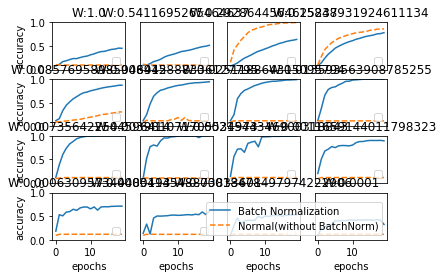

In [39]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


In [40]:
## << Overfit >>

epoch:0, train acc:0.13, test acc:0.1106
epoch:1, train acc:0.16333333333333333, test acc:0.1234
epoch:2, train acc:0.18, test acc:0.1391
epoch:3, train acc:0.19666666666666666, test acc:0.1486
epoch:4, train acc:0.20666666666666667, test acc:0.161
epoch:5, train acc:0.24333333333333335, test acc:0.1696
epoch:6, train acc:0.26666666666666666, test acc:0.1907
epoch:7, train acc:0.3, test acc:0.1999
epoch:8, train acc:0.32, test acc:0.2146
epoch:9, train acc:0.35333333333333333, test acc:0.2256
epoch:10, train acc:0.36, test acc:0.2344
epoch:11, train acc:0.44666666666666666, test acc:0.2794
epoch:12, train acc:0.43666666666666665, test acc:0.2845
epoch:13, train acc:0.48333333333333334, test acc:0.3013
epoch:14, train acc:0.49666666666666665, test acc:0.3318
epoch:15, train acc:0.52, test acc:0.3627
epoch:16, train acc:0.5333333333333333, test acc:0.3733
epoch:17, train acc:0.56, test acc:0.3957
epoch:18, train acc:0.5633333333333334, test acc:0.4095
epoch:19, train acc:0.59, test acc:0

epoch:169, train acc:1.0, test acc:0.7523
epoch:170, train acc:1.0, test acc:0.7536
epoch:171, train acc:1.0, test acc:0.7523
epoch:172, train acc:1.0, test acc:0.753
epoch:173, train acc:1.0, test acc:0.7532
epoch:174, train acc:1.0, test acc:0.7532
epoch:175, train acc:1.0, test acc:0.7534
epoch:176, train acc:1.0, test acc:0.7535
epoch:177, train acc:1.0, test acc:0.753
epoch:178, train acc:1.0, test acc:0.7524
epoch:179, train acc:1.0, test acc:0.7542
epoch:180, train acc:1.0, test acc:0.7555
epoch:181, train acc:1.0, test acc:0.7544
epoch:182, train acc:1.0, test acc:0.7534
epoch:183, train acc:1.0, test acc:0.7555
epoch:184, train acc:1.0, test acc:0.7557
epoch:185, train acc:1.0, test acc:0.756
epoch:186, train acc:1.0, test acc:0.7544
epoch:187, train acc:1.0, test acc:0.7528
epoch:188, train acc:1.0, test acc:0.7543
epoch:189, train acc:1.0, test acc:0.7547
epoch:190, train acc:1.0, test acc:0.754
epoch:191, train acc:1.0, test acc:0.7569
epoch:192, train acc:1.0, test acc:0.7

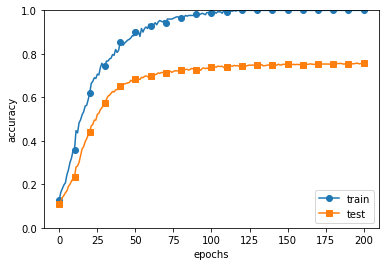

In [48]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [54]:
######### << Regularization >> 

In [44]:
## << Weight Decay >>
## 학습 과정에서 큰 가중치에 대해 그에 상응하는 페널티를 부과하여 오버피팅 억제하는 기법

In [46]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class MultiLayerNet:
    """완전연결 다층 신경망

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'tanh'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads


epoch:0, train acc:0.07666666666666666, test acc:0.0884
epoch:1, train acc:0.07, test acc:0.0867
epoch:2, train acc:0.06333333333333334, test acc:0.0844
epoch:3, train acc:0.06333333333333334, test acc:0.0848
epoch:4, train acc:0.07666666666666666, test acc:0.0867
epoch:5, train acc:0.1, test acc:0.1
epoch:6, train acc:0.13333333333333333, test acc:0.1172
epoch:7, train acc:0.17666666666666667, test acc:0.1341
epoch:8, train acc:0.21333333333333335, test acc:0.1602
epoch:9, train acc:0.25, test acc:0.1816
epoch:10, train acc:0.2633333333333333, test acc:0.2108
epoch:11, train acc:0.31333333333333335, test acc:0.2387
epoch:12, train acc:0.35, test acc:0.259
epoch:13, train acc:0.37, test acc:0.2848
epoch:14, train acc:0.3933333333333333, test acc:0.3048
epoch:15, train acc:0.44333333333333336, test acc:0.3218
epoch:16, train acc:0.45666666666666667, test acc:0.34
epoch:17, train acc:0.4533333333333333, test acc:0.3492
epoch:18, train acc:0.46, test acc:0.3559
epoch:19, train acc:0.45333

epoch:160, train acc:0.8333333333333334, test acc:0.6807
epoch:161, train acc:0.84, test acc:0.679
epoch:162, train acc:0.8533333333333334, test acc:0.6843
epoch:163, train acc:0.8633333333333333, test acc:0.6966
epoch:164, train acc:0.8666666666666667, test acc:0.7022
epoch:165, train acc:0.8566666666666667, test acc:0.6988
epoch:166, train acc:0.8466666666666667, test acc:0.6922
epoch:167, train acc:0.8533333333333334, test acc:0.682
epoch:168, train acc:0.8666666666666667, test acc:0.6908
epoch:169, train acc:0.8633333333333333, test acc:0.6715
epoch:170, train acc:0.8566666666666667, test acc:0.687
epoch:171, train acc:0.8633333333333333, test acc:0.6915
epoch:172, train acc:0.8633333333333333, test acc:0.6888
epoch:173, train acc:0.8633333333333333, test acc:0.6863
epoch:174, train acc:0.8666666666666667, test acc:0.6923
epoch:175, train acc:0.8566666666666667, test acc:0.6916
epoch:176, train acc:0.8533333333333334, test acc:0.6874
epoch:177, train acc:0.8666666666666667, test ac

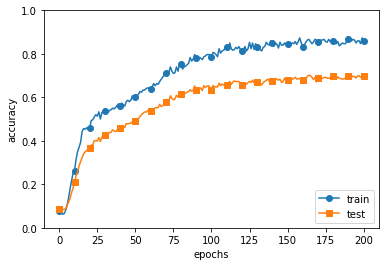

In [47]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [51]:
## << Dropout >>
## 신경망 모델이 복잡해지면 가중치 감소만으로 대응하기에는 어려워진다.
## 드롭아웃은 훈련 때 데이터를 넣어줄 때마다 무작위로 뉴런을 삭제하고 시험 때 모든 뉴런에 신호 전달한다.
## 머신러닝의 '앙상블 학습'과 비슷하다.

In [53]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask
    
## 순전파 때 삭제한 뉴런은 역전파 때도 차단한다.

In [55]:
############ << HyperParameter Setting >>

In [57]:
## << Validation data >>
## 지금까지는 train set 과 test set으로 나눠 학습과 범용 성능 평가에 사용해 오버피팅인지 등을 파악했다.
## 그러나 하이퍼파라미터의 성능을 평가할 때는 test set을 사용하면 안 된다. 
## test set으로 하이퍼파라미터를 조정하면 test set에 하이퍼파라미터가 오버피팅 된다. 그래서 범용 성능 저하 된다. 
## 그래서 하이퍼파리미터 조정용 데이터로 validation data를 따로 마련한다.

In [58]:
## 훈련 데이터 : 매개변수 학습
## 검증 데이터 : 하이퍼파라미터 성능 평가
## 시험 데이터 : 신경망 범용 성능 평가

In [62]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.util import shuffle_dataset
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [64]:
## << HyperParameter Optimization >>
## 하이퍼파라미터 최적화할 때 핵심은 최적값이 존재하는 범위를 조금씩 줄여간다는 것이다.
## 대략적인 범위를 설정해 무작위로 값을 골라낸 후, 그 값으로 정확도를 평가한다.
## 이 작업을 여러 번 반복하면서 최적값의 범위를 좁혀간다.
## 신경망의 하이퍼파라미터 최적화에서는 그리드 서치(Grid Search)같은 규칙적인 탐색보다 무작위로 샘플링해 탐색하는 편이 
## 좋은 결과를 낸다고 알려져 있다.

In [65]:
## 하이퍼 파라미터 범위는 대략적으로 '로그 스케일'로 지정한다. (10의 -3 ~ 3)

val acc:0.26 | lr:0.0019245817382874052, weight decay:2.326990275411234e-08
val acc:0.15 | lr:2.796595950483421e-06, weight decay:1.0999218653240849e-05
val acc:0.17 | lr:4.508034050980899e-06, weight decay:4.974652000982684e-07
val acc:0.19 | lr:6.685665847132358e-06, weight decay:1.8536980661690626e-06
val acc:0.09 | lr:2.6707753110997955e-06, weight decay:3.0668206997712836e-08
val acc:0.08 | lr:1.8943636905389304e-05, weight decay:1.0184957991079715e-07
val acc:0.82 | lr:0.004752089606125033, weight decay:1.5058143613962155e-06
val acc:0.15 | lr:8.509632756824954e-05, weight decay:1.1551462710590836e-07
val acc:0.05 | lr:0.00025585515818065253, weight decay:9.247456416648204e-08
val acc:0.25 | lr:0.0014533594635852895, weight decay:2.8983226199626e-08
val acc:0.07 | lr:0.00012051054657172773, weight decay:2.543382382196694e-07
val acc:0.15 | lr:0.0004995164834300425, weight decay:3.3536951909899665e-05
val acc:0.09 | lr:1.4904931068457277e-05, weight decay:1.0548256865207193e-05
va

Best-11(val acc:0.6) | lr:0.0037341415262752762, weight decay:2.102317437389965e-06
Best-12(val acc:0.58) | lr:0.002622722995561128, weight decay:4.468337512685331e-06
Best-13(val acc:0.55) | lr:0.0043652552039360895, weight decay:1.980564514337327e-05
Best-14(val acc:0.54) | lr:0.003622932587231376, weight decay:2.3222296386573107e-05
Best-15(val acc:0.5) | lr:0.0019403551245887355, weight decay:1.0924387250433797e-07
Best-16(val acc:0.45) | lr:0.003543975451885637, weight decay:1.6890151353167032e-05
Best-17(val acc:0.44) | lr:0.002384395890077729, weight decay:1.6927463159800702e-08
Best-18(val acc:0.42) | lr:0.0025054836659283994, weight decay:1.8349343955638392e-05
Best-19(val acc:0.4) | lr:0.0018697104468359815, weight decay:4.320235519994446e-05
Best-20(val acc:0.29) | lr:0.0012728920781044845, weight decay:1.018598252769974e-08


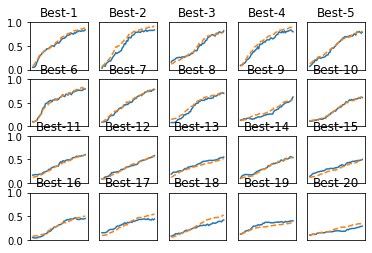

In [66]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
